In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
cola = pd.read_excel(r"C:\Users\Muralidhar\Downloads\CocaCola_Sales_Rawdata.xlsx")
cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [19]:
cola.shape

(42, 2)

In [20]:
cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [21]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [22]:
cola.dtypes

Quarter     object
Sales      float64
dtype: object

(array([[42.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  6., 12.,  6.,  7.,  4.,  3.,  3.]]),
 array([0.0, 525.3, 1050.6, 1575.8999999999999, 2101.2, 2626.5,
        3151.7999999999997, 3677.0999999999995, 4202.4, 4727.7, 5253.0],
       dtype=object),
 <a list of 2 BarContainer objects>)

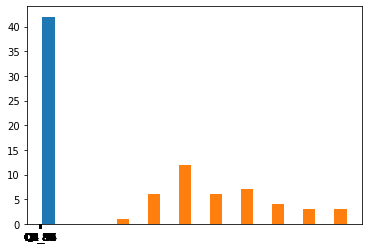

In [23]:
plt.hist(cola)

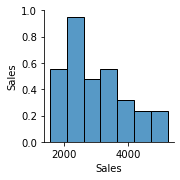

In [24]:
sns.pairplot(cola)

In [25]:
from pandas import Grouper
from pandas import DataFrame

In [26]:
cola[cola.duplicated()].shape

(0, 2)

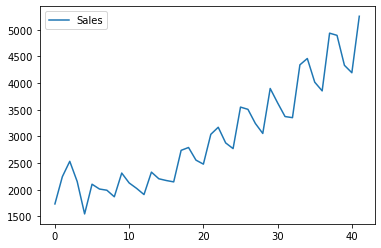

In [28]:
cola.plot()
plt.show()#data shows an upward pattern

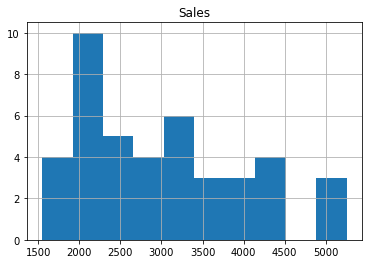

In [29]:
cola.hist()
plt.show()#histogram 

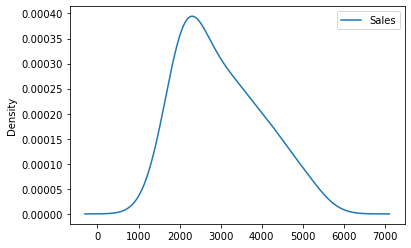

In [30]:
cola.plot(kind='kde')
plt.show()#density plot 

In [31]:
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

<AxesSubplot:xlabel='Quarter', ylabel='Quarter'>

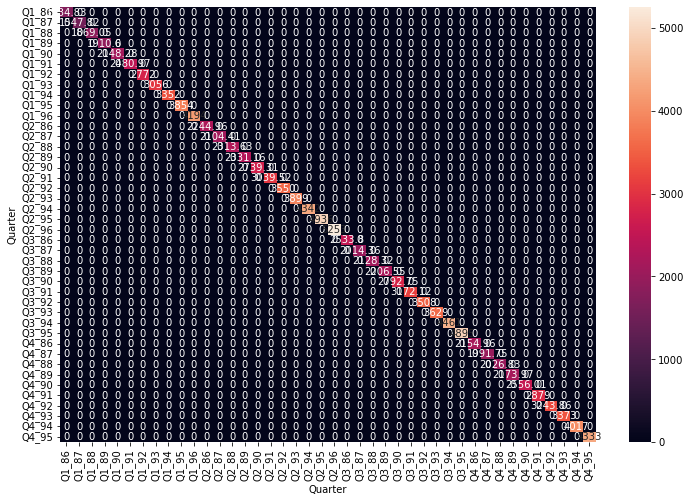

In [35]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=cola,values="Sales",index="Quarter",columns="Quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


In [36]:
cola.shape

(42, 2)

In [38]:
Train = cocola.head(48)
Test =cocola.tail(12)

In [39]:
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 

In [58]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) # 9.68

9.681026212917576

In [57]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) # 11.025


11.02518244098768

In [56]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) # 2.88

C:\Users\Muralidhar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


2.8845191331057514

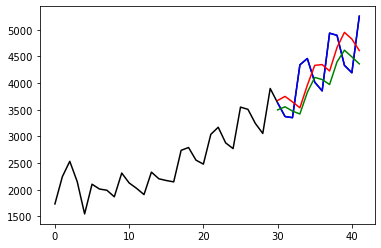

In [60]:
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")